Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> "Improve" comments mean that there are tiny corrections that could help you to make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* You've worked really hard and submitted a solid project.
* Thank you for structuring the project. It's a pleasure to check such notebooks.
* There is one thing that need to be done before your project is complete, but it's pretty straightforward.
* There are few things I'd like you to check. They're not mistakes, but your project could be improved if you correct them.
* While there's room for improvement, on the whole, your project is looking good.
* I believe you can easily fix it! Good luck!

### <font color='orange'>General feedback (review 2)</font>
* All your hard work has paid off, and now your project is perfect!
* Keep up the good work. Good luck next!

# Project description

Beta Bank customers are leaving: little by little, chipping away every month.

The bankers figured out it’s cheaper to save the existing customers rather than
to attract new ones.

We need to predict whether a customer will leave the bank soon. You have the
data on clients’ past behavior and termination of contracts with the bank.

Build a model with the maximum possible F1 score. 
To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.

Additionally, measure the AUC-ROC metric and compare it with the F1.

Data source: https://www.kaggle.com/barelydedicated/bank-customer-churnmodeling{target="blank"}

# Data Description

The data can be found in '/datasets/Churn.csv' file. Download the dataset.

**Features:**

`RowNumber` — data string index

`CustomerId` — unique customer identifier

`Surname` — surname

`CreditScore` — credit score

`Geography` — country of residence

`Gender` — gender

`Age` — age

`Tenure` — period of maturation for a customer’s fixed deposit (years)

`Balance` — account balance

`NumOfProducts` — number of banking products used by the customer

`HasCrCard` — customer has a credit card

`IsActiveMember` — customer’s activeness

`EstimatedSalary` — estimated salary

**Target**

`Exited` — сustomer has left

# Table of Content

<div> 
    <ol>
      <li><a href="#1">Download and prepare the data</a></li>
      <li><a href="#2">Examine the balance of classes</a></li>
      <li><a href="#3">Improve the quality of the model</a></li>
      <li><a href="#4">Perform the final testing</a></li>
      <li><a href="#5">Overall conclusion</a></li>
    </ol> 
</div>

# <a id="1">Download and prepare the data

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd
import random

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn for visualization
import seaborn as sns

# import train_test_split to split data
from sklearn.model_selection import *
from sklearn.preprocessing import *
pd.options.mode.chained_assignment = None # to avoid SettingWithCopyWarning after scaling

# import machine learning module from the sklearn library
from sklearn.dummy import DummyClassifier # import dummy classifier
from sklearn.tree import DecisionTreeClassifier # import decision tree classifier
from sklearn.linear_model import LogisticRegression # import logistic regression 
from sklearn.ensemble import RandomForestClassifier # import random forest algorithm
from catboost import CatBoostClassifier
import random
random.seed(42)
np.random.seed(42)
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
from sklearn.metrics import *
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

# import warnings
import warnings
warnings.filterwarnings('ignore')

# import sklearn utilities
from sklearn.utils import shuffle

<div class="alert alert-block alert-success">
<b>Success:</b> Thank you for collecting all imports in the first cell!
</div>

## Data Investigation

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [3]:
# function to check na percent within the data
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

Get the general infos about the dataframe

In [4]:
get_info(df)

----------------------------------------------------------------------------------------------------
Head:



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


----------------------------------------------------------------------------------------------------


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457



Columns with nulls:
Column Tenure has 9.0900% percent of Nulls, and 909 of nulls
There are 1 columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(10000, 14)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




From the general infos we conclude that:
- our dataframe is composed of 10000 rows and 14 columns
- Missing data are MAR 
- with a 9.99% of missings in `Tenure` column
- since the missing percent is less than 10%, we can drop it, or we can replace the nas with the mean, we'll see, but 

<div class="alert alert-block alert-success">
<b>Success:</b> Data loading and initial analysis were done well!
</div>

## Data Preparation

**Tenure column**

- We get unique values of `Surname` in order to get the specific `Tenure` for those unique names

In [5]:
# replace missing values in the Tenure column
# get unique values of name from this dataframe
for surname in df['Surname'].unique().tolist():
    # get specific 'Surname' possible Tenure
    specific_surname_df = df[df['Surname'] == surname].dropna()['Tenure']
    surname_tenure_list = specific_surname_df.unique().tolist()
    # for the missing values, assign a random choice of the tenure for that surname. The default is the median of the 'Tenure'
    if surname_tenure_list != []:
        df.loc[(df['Surname'] == surname) & (df['Tenure'] != df['Tenure']), 'Tenure'] = random.choice(surname_tenure_list)
    else:
        df.loc[(df['Surname'] == surname) & (df['Tenure'] != df['Tenure']), 'Tenure'] = df['Tenure'].median()

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.008400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.871333,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<div class="alert alert-block alert-info">
<b>Improve: </b> It's better not to use random for filling nans. 
</div>

- Convert data to the correct data type

In [8]:
def convert_to_type(df, cols, type_val):
    for col in cols:
        df[col] = df[col].astype(type_val)
        
convert_to_type(df, ['Surname', 'Geography', 'Gender'], str)
convert_to_type(df, ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'], 'int64')
convert_to_type(df, ['Balance', 'EstimatedSalary'], float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Conclusion**

- We've replaced missing values, 
- changed dataypes
- the data seems clean now, we can proceed to feature engineering

## Feature preparation

For features we will use:
- One-Hot-Encoding for categorical features

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Some features are useless for our predictions and analysis, we will drop them, like `CustomerId`, `Surname` and `RowNumber`

In [11]:
df = df.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<div class="alert alert-block alert-success">
<b>Success:</b> I agree that we don't need these columns.
</div>

**OHE**: one-hot encoding of categorical features

In [13]:
df_ohe = pd.get_dummies(df, drop_first=True) 

**Declare features and target variables**

In [14]:
target = df_ohe['Exited']
features = df_ohe.drop(['Exited'], axis=1)

<div class="alert alert-block alert-success">
<b>Success:</b> The data was encoded in the right way!
</div>

**Split data into training and testing**

In [15]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.30, random_state=12345
)

# display the shape of the split dataset
print('The train set now contains {}'.format(features_train.shape[0]) + ' observations representing 70% of the data')
print('The test set now contains {}'.format(features_test.shape[0]) + ' observations representing 30% of the data')
print()

The train set now contains 7000 observations representing 70% of the data
The test set now contains 3000 observations representing 30% of the data



**Features scaling**

In [16]:
# numeric features in dataset
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
           'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# features scaling
scaler = StandardScaler()
scaler.fit(features_train[numeric])
# transform the training set and the test set using transform()
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric]  = scaler.transform(features_test[numeric])
    
print("\033[1m" + 'Shape of features and target' + "\033[0m")
print('-'*30)
print('Train features :', features_train.shape)
print('Train target   :',target_train.shape)
print('Test features  :',features_test.shape)
print('Test target    :',target_test.shape)
print()
display(features_train.head())

Shape of features and target
------------------------------
Train features : (7000, 11)
Train target   : (7000,)
Test features  : (3000, 11)
Test target    : (3000,)



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9716,1.658077,0.012853,-0.013195,0.635477,2.527132,0.645536,0.955284,1.480907,1,0,1
224,0.198643,0.584111,0.336667,0.375870,-0.895510,0.645536,0.955284,0.153167,1,0,1
589,-1.374648,0.774530,0.336667,1.302947,0.815811,-1.549099,-1.046809,0.817773,0,1,0
7507,-0.784664,0.488901,1.386252,0.696496,-0.895510,0.645536,-1.046809,0.329403,1,0,1
1457,2.051400,2.583513,-0.363056,-1.222967,0.815811,-1.549099,0.955284,-0.617269,0,0,1


**Conclusion**
- We’ve used OHE One-Hot-Encoding for changing the categorical features to numerical ones.
- Allowing all the added features of each data type (for example both male and female columns to remain) can damage our predictions outcome, and we can fall into the dummy trap because of their high correlation. 
- To avoid this, we can remove one feature of each data type, and this will not impact on the predictions since we can inferre to one from the other, if one is 0 the other is 1, and so one. 
- We split the data into 70% training set, and 30% testing sets.
- We standardized the numerical features of the data, since the features have different scales.
- The resulting dataset now is:
    - 7000 rows and 11 columns for the train features set
    - 3000 rows and 11 columns for the test features set

<div class="alert alert-block alert-success">
<b>Success:</b> Great that scaler was trained only on train set. It helps to reduce overfitting.
</div>

# <a id="2">Examine the balance of classes

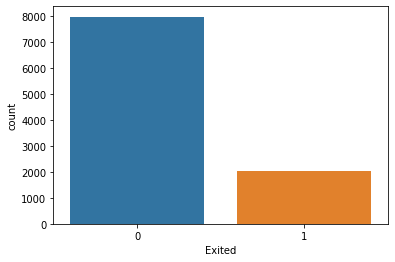

In [17]:
sns.countplot(df['Exited'])

- First, let's look at the class imbalance

In [18]:
print(df[df['Exited'] == 1]['Exited'].count())
print(df[df['Exited'] == 0]['Exited'].count())

2037
7963


- Clearly we can the significant imbalance problem
- let's check how it will impact our model

Let's first calculate the evaluation metrics

In [19]:
def print_model_evaluation(y_test, test_predictions):
    print("\033[1m" + 'F1 score: ' + "\033[0m", '{:.3f}'.format(f1_score(y_test, test_predictions)))
    print("\033[1m" + 'Accuracy Score: ' + "\033[0m", '{:.2%}'.format(accuracy_score(y_test, test_predictions)))
    print("\033[1m" + 'Precision: ' + "\033[0m", '{:.3f}'.format(precision_score(y_test, test_predictions)))
    print("\033[1m" + 'Recall: ' + "\033[0m", '{:.3f}'.format(recall_score(y_test, test_predictions)))
    print("\033[1m" + 'Balanced Accuracy Score: ' + "\033[0m", '{:.2%}'.format(balanced_accuracy_score(y_test, test_predictions)))
    print("\033[1m" + 'ROC AUC Score: ' + "\033[0m", '{:.2%}'.format(roc_auc_score(y_test, test_predictions)))
    print()
    print("\033[1m" + 'Confusion Matrix' + "\033[0m")
    print('-'*50)
    print(confusion_matrix(y_test, test_predictions))
    print()
    print("\033[1m" + 'Classification report' + "\033[0m")
    print('-'*50)
    print(classification_report(y_test, test_predictions))
    print()

**Baseline Model using a dummy classifier**

In [20]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train)
dummy_clf_test_predictions = dummy_clf.predict(features_test)

In [21]:
# evaluate baseline model
print_model_evaluation(target_test, dummy_clf_test_predictions)

F1 score:  0.000
Accuracy Score:  79.13%
Precision:  0.000
Recall:  0.000
Balanced Accuracy Score:  50.00%
ROC AUC Score:  50.00%

Confusion Matrix
--------------------------------------------------
[[2374    0]
 [ 626    0]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2374
           1       0.00      0.00      0.00       626

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000




- The baseline model predicts the most frequent class which is "0" in our case. 
- Looking at this report, we see that:
    - the accuracy is high 
    - but the F1 score is 0.0. 
- This goes to class imbalance. Which is showing that accuracy alone is not sufficient to evaluate the model’s performance.

We then examine the balance of classes and train the model without taking into account the imbalance.

In [22]:
# create the logistic regression model
def logistic_regression(X_train, y_train, X_test, y_test):
    """
    This is a logistic regression model function developed to train
    the model, make prediction on train and test dataset, print
    model accuracy for training and testing datasets
    """
    model = LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(X_train, y_train) # train the model 
    train_predictions = model.predict(X_train) # make predictions on train set
    test_predictions = model.predict(X_test) # make prediction on test set
    print('F1 score for logistic regression model')
    print('-'*35)
    print('F1 score: {:.3f}'.format(f1_score(y_test, test_predictions)))
    print()
    print('The default F1-score of the logistic regression model is ' "\033[1m" + 
          '{:.3f}.'.format(f1_score(y_test, test_predictions)) + "\033[0m" +
          ' The accuracy measured {:.3f}'.format(accuracy_score(y_train, train_predictions)) +
          ' for training set and {:.3f}'.format(accuracy_score(y_test, test_predictions)) + ' for the testing set.')

In [23]:
# determine accuracy for logistic regression model
logistic_regression(features_train, target_train, features_test, target_test)

F1 score for logistic regression model
-----------------------------------
F1 score: 0.302

The default F1-score of the logistic regression model is 0.302. The accuracy measured 0.815 for training set and 0.801 for the testing set.


0    0.924
1    0.076
dtype: float64


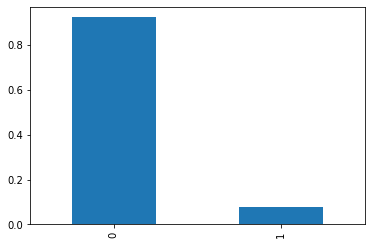

In [24]:
# sanity check
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train) # train the model 
test_predictions = pd.Series(model.predict(features_test))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

**Conclusion**

- In this section, we trained the model pretending that we don't know anything about class imbalance.
- We achieved an F1 score of 0.303. 
- We assess the sanity of the model by checking how often the target feature contains the class "1" or "0".
- We can see the class imbalance in the predicted testing set.

We will now try to improve the quality of the model.

<div class="alert alert-block alert-success">
<b>Success:</b> This part was done well!
</div>

# <a id="3">Improve the quality of the model

We will use 2 approaches to improve the quality of the model:
- Class weight adjustment
- Upsampling

**Class Weight Adjustment**

In [25]:
model = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
model.fit(features_train, target_train)
test_predictions = model.predict(features_test) 
print('F1 score with adjusted class weight: {:.3f}'.format(f1_score(target_test, test_predictions)))

F1 score with adjusted class weight: 0.493


0    0.620333
1    0.379667
dtype: float64


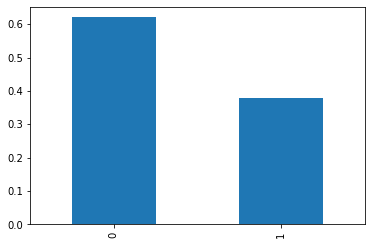

In [26]:
# sanity check after class imbalance
test_predictions = pd.Series(model.predict(features_test))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

- By modifying the class_weight='balanced', we can notice how the F1 score increased to 0.493.

**Upsampling**

In [27]:
# function to perform upsampling 
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled

# new training set created
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 5
)

In [28]:
# F1 score after upsampling 
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
test_predictions = model.predict(features_test) 
print('F1 score after upsampling: {:.3f}'.format(f1_score(target_test, test_predictions)))

F1 score after upsampling: 0.484


- For the upsampling part, we first split the training sample into negative and positive observations, duplicated the positive observations and combine them with the negative class observation. 
- Then we shuffled the data using shuffle() function, and trained our LogisticRegression model with the new data. 
- We calculated the F1 score = 0.484. 
- We went from an F1 score of 0.303 to F1 score = 0.484 which is an improvement when the class is balanced.

<div class="alert alert-block alert-success">
<b>Success:</b> Right that upsampling was applied only to train set.
</div>

# <a id="3">Improve the quality of the model

In [29]:
# function to plot ROC curve
def plot_roc(y_test, preds, ax=None, label='model'):
    with plt.style.context('seaborn-whitegrid'):
        """
        This function plots the ROC curve
        """
        if not ax: fig, ax = plt.subplots(1, 1)
        fpr, tpr, thresholds = roc_curve(y_test, preds)
        ax.plot([0, 1], [0, 1],'r--')
        ax.plot(fpr, tpr, lw=2, label=label)
        ax.legend(loc='lower right')
        ax.set_title(
            'ROC curve\n'
            f""" AP: {average_precision_score(
                y_test, preds, pos_label=1
            ):.2} | """
            f'AUC: {auc(fpr, tpr):.2}'
        )
        ax.set_xlabel('False Positive Rate (FPR)')
        ax.set_ylabel('True Positive Rate (TPR)')
        ax.annotate(f'AUC: {auc(fpr, tpr):.2}', xy=(.43, .025))
        ax.legend()
        ax.grid()
        return ax
    
# function to plot the precision-recall curve
def plot_pr(y_test, preds, ax=None, label='model'):
    with plt.style.context('seaborn-whitegrid'):
        """
        This function is used to the precision-recall curve 
        """
        precision, recall, thresholds = precision_recall_curve(y_test, preds)
        if not ax: fig, ax = plt.subplots()
        ax.plot([0, 1], [1, 0],'r--')    
        ax.plot(recall, precision, lw=2, label=label)
        ax.legend()
        ax.set_title(
            'Precision-recall curve\n'
            f""" AP: {average_precision_score(
                y_test, preds, pos_label=1
            ):.2} | """
            f'AUC: {auc(recall, precision):.2}'
        )
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_xlim(-0.05, 1.05)
        ax.set_ylim(-0.05, 1.05)
        ax.legend()
        ax.grid()
        return ax

### Hyperparameter Tuning

We are going to try and tune the hyperparameters of the following classification algorithms.

**Decision Tree Classifier**

- We iterate over different values and compare the quality of the model by tuning `max_depth` hyperparameter. 
- In `GridSearchCV`, we pass scoring='f1' to tune the target metric which is the F1-score.

In [30]:
# hyperparameter optimization for Decision tree classifier
parameters = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [2, 4, 8, 16],
    "min_samples_split" : [2, 4, 8, 16],
    "min_samples_leaf" : [2, 4, 6]
    }
classifier = DecisionTreeClassifier()
grid = GridSearchCV(classifier, parameters, scoring='f1', cv=5)
grid.fit(features_train, target_train) 
y_pred = grid.predict(features_test)
print('The parameters combination that would give best F1 score is : ')
print(grid.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is: {:.3f}'.format(grid.best_score_))
print('The accuracy of the model against the training data is: {:.3f}'.format(grid.score(features_train, target_train)))
print('F1 score: ', f1_score(target_test, y_pred))

The parameters combination that would give best F1 score is : 
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 16}
The best accuracy achieved after parameter tuning via grid search is: 0.555
The accuracy of the model against the training data is: 0.632
F1 score:  0.5369261477045908


<div class="alert alert-block alert-success">
<b>Success:</b> Glad to see that our target metric was specified in "scoring" parameter.
</div>

In [31]:
# create the decision tree classifier
def decision_tree_classifier(X_train, y_train, X_test, y_test):
    # define lists to collect scores
    train_scores = []
    test_scores = []
    f1_scores = []
    model = DecisionTreeClassifier(**grid.best_params_) 
    model.fit(X_train, y_train) # train the model
    # make predictions on train set
    train_predictions = model.predict(X_train)
    train_predictions_acc = accuracy_score(y_train, train_predictions)
    train_scores.append(train_predictions_acc)
    # make predictions on testing set
    dt_test_predictions = model.predict(X_test) 
    dt_test_predictions_acc = accuracy_score(y_test, dt_test_predictions)
    test_scores.append(dt_test_predictions_acc)
    f1_score_ = f1_score(y_test, dt_test_predictions)
    f1_scores.append(f1_score_)
    scores = list(zip(f1_scores, train_scores, test_scores))
    print('The decision tree classifier had the best ' "\033[1m" + 'F1 score of {:.3f}'.format(max(scores, key = lambda x: x[0])[0]) + "\033[0m" +   
          ' and accuracy of ' "\033[1m" '{:.2%}'.format(max(scores, key = lambda x: x[0])[1]) + ' for the training set' + "\033[0m" + 
          ' and ' + "\033[1m" '{:.2%}'.format(max(scores, key = lambda x: x[0])[2]) + ' for the testing set' + "\033[0m")
    print()
    # evaluate decision tree classifier metric
    print_model_evaluation(target_test, dt_test_predictions)

In [32]:
# determine F1 score for decision tree classifier
decision_tree_classifier(features_train, target_train, features_test, target_test)

The decision tree classifier had the best F1 score of 0.542 and accuracy of 87.90% for the training set and 84.60% for the testing set

F1 score:  0.542
Accuracy Score:  84.60%
Precision:  0.715
Recall:  0.436
Balanced Accuracy Score:  69.51%
ROC AUC Score:  69.51%

Confusion Matrix
--------------------------------------------------
[[2265  109]
 [ 353  273]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2374
           1       0.71      0.44      0.54       626

    accuracy                           0.85      3000
   macro avg       0.79      0.70      0.72      3000
weighted avg       0.83      0.85      0.83      3000




- We used `GridSearchCV` for the hyperparameter optimization on the max_depth, criterion, min_samples_split, and min_samples_leaf parameters. 
- Since we are looking for the best parameter setting for our decision tree classifier. We note that shallow decision trees (e.g. few depth) generally do not overfit but have poor performance (high bias, low variance), and deep trees (e.g. high depth) generally do overfit and have good performance (low bias, high variance). 
- Our desirable tree depth is one that is not so shallow that it has low performance and not so deep that it overfits the training dataset. We need to have a balance between bias and variance - bias variance tradeoff. 
- At max_depth of 8, we have an F1 score of 0.54, an accuracy of 87.90% for the training set, and 84.50% for the testing set.

**Logistic Regression Model**

In [33]:
# hyperparameter optimization
# define parameters
grid = {
    "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
    "penalty" : ['l2'],
    "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
# define grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the model
regressor = LogisticRegression()
grid_search = GridSearchCV(estimator = regressor, param_grid = grid, 
                           n_jobs=-1, cv=cv, scoring='f1', error_score=0)
grid_search.fit(features_train, target_train) 
y_pred = grid_search.predict(features_test)
print('The parameters combination that would give best F1 score is : ')
print(grid_search.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is: {:.3f}'.format(grid_search.best_score_))
print('The accuracy of the model against the training data is: {:.3f}'.format(grid_search.score(features_train, target_train)))
print('F1 score: ', f1_score(target_test, y_pred))

The parameters combination that would give best F1 score is : 
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
The best accuracy achieved after parameter tuning via grid search is: 0.327
The accuracy of the model against the training data is: 0.328
F1 score:  0.30069930069930073


In [34]:
# create the logistic regression model
def logistic_regression(X_train, y_train, X_test, y_test):
    """
    This is a logistic regression model function developed to train
    the model, make prediction on train and testing dataset, 
    and print F1 score and evaluation metrics for testing datasets
    """
    # define lists to collect scores
    train_scores = []
    test_scores = []
    f1_scores = []
    model = LogisticRegression(**grid_search.best_params_)
    model.fit(X_train, y_train) # train the model 
    # make predictions on train set
    train_predictions = model.predict(X_train)
    train_predictions_acc = accuracy_score(y_train, train_predictions)
    train_scores.append(train_predictions_acc)
    # make predictions on testing set
    lr_test_predictions = model.predict(X_test) 
    lr_test_predictions_acc = accuracy_score(y_test, lr_test_predictions)
    test_scores.append(lr_test_predictions_acc)
    f1_score_ = f1_score(y_test, lr_test_predictions)
    f1_scores.append(f1_score_)
    scores = list(zip(f1_scores, train_scores, test_scores))
    print('The logistic regression classifier had the best ' "\033[1m" + 
          'F1 score of {:.3f} '.format(max(scores, key = lambda x: x[0])[0]) + "\033[0m" + 
          'using' "\033[1m" + ' C parameter of {},'.format(grid_search.best_params_['C']) + "\033[0m" +
          "\033[1m" + ' {} as logistic regression solver'.format(grid_search.best_params_['solver']) + "\033[0m" +
          ' leading to an accuracy of ' "\033[1m" + '{:.2%}'.format(max(scores, key = lambda x: x[0])[1]) + ' for the training set ' + "\033[0m" + 
          'and ' + "\033[1m" '{:.2%}'.format(max(scores, key = lambda x: x[0])[2]) + ' for the testing set' + "\033[0m")
    print()
    # evaluate logistic regression classifier metric
    print_model_evaluation(target_test, lr_test_predictions)

In [35]:
# determine F1 score for logistic regression model
logistic_regression(features_train, target_train, features_test, target_test)

The logistic regression classifier had the best F1 score of 0.301 using C parameter of 10, liblinear as logistic regression solver leading to an accuracy of 81.49% for the training set and 80.00% for the testing set

F1 score:  0.301
Accuracy Score:  80.00%
Precision:  0.556
Recall:  0.206
Balanced Accuracy Score:  58.13%
ROC AUC Score:  58.13%

Confusion Matrix
--------------------------------------------------
[[2271  103]
 [ 497  129]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      2374
           1       0.56      0.21      0.30       626

    accuracy                           0.80      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.77      0.80      0.76      3000




- We tuned the "C" parameter for the logistic regression model. 
- the F1 score is low at 0.297
- The logistic regression model gave an accuracy of 81.56 % for the training set, and 80% for the testing sets when using a "C" parameter of 10. 
- We can see here that neither the training nor the testing score is high enough. This is because the model is not complex enough and underfitting may occur.

**Random Forest Classifier**

In [36]:
# hyperparameter optimization for Random Forest classifier
# define the hyperparameter to tune
parameters = {
    "criterion" : ["gini", "entropy"],
    "n_estimators" : [10, 50],
    "max_depth" : [None, 2, 4, 8, 10, 12],
    "min_samples_split" : [2, 4, 8, 16],
    "min_samples_leaf" : [2, 4, 6]
    }
# define the model with default hyperparameters
classifier = RandomForestClassifier()
# define the grid search procedure
grid_rf = GridSearchCV(estimator=classifier, param_grid=parameters, 
                    cv=5, scoring='f1')
# execute the grid search
grid_rf.fit(features_train, target_train) 
y_pred = grid_rf.predict(features_test)
print('The parameters combination that would give best F1 score is : ')
print(grid_rf.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is: {:.3f}'.format(grid_rf.best_score_))
print('The accuracy of the model against the training data is: {:.3f}'.format(grid_rf.score(features_train, target_train)))
print('F1 score: ', f1_score(target_test, y_pred))

The parameters combination that would give best F1 score is : 
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 50}
The best accuracy achieved after parameter tuning via grid search is: 0.576
The accuracy of the model against the training data is: 0.742
F1 score:  0.5567010309278351


In [37]:
# create the random forest classifier model
def random_forest_classifier(X_train, y_train, X_test, y_test):
    """
    This is a random forest classifier function developed to train
    the model, make prediction on train and testing dataset, 
    and print F1 score and evaluation metrics for testing datasets
    """
    # define lists to collect scores
    train_scores = []
    test_scores = []
    f1_scores = []
    model = RandomForestClassifier(**grid_rf.best_params_)
    model.fit(X_train, y_train) # train the model 
    # make predictions on train set
    train_predictions = model.predict(X_train)
    train_predictions_acc = accuracy_score(y_train, train_predictions)
    train_scores.append(train_predictions_acc)
    # make predictions on testing set
    rf_test_predictions = model.predict(X_test) 
    rf_test_predictions_acc = accuracy_score(y_test, rf_test_predictions)
    test_scores.append(rf_test_predictions_acc)
    f1_score_ = f1_score(y_test, rf_test_predictions)
    f1_scores.append(f1_score_)
    scores = list(zip(f1_scores, train_scores, test_scores))
    print('The random forest classifier had the best ' "\033[1m" + 
          'F1 score of {:.3f} '.format(max(scores, key = lambda x: x[0])[0]) + "\033[0m" + 
          'using' "\033[1m" + ' n_estimate value of {},'.format(grid_rf.best_params_['n_estimators']) + "\033[0m" +
          "\033[1m" + ' maximum tree depth of {}'.format(grid_rf.best_params_['max_depth']) + "\033[0m" +
          ' giving an accuracy of ' "\033[1m" + '{:.2%}'.format(max(scores, key = lambda x: x[0])[1]) + ' for the training set ' + "\033[0m" + 
          'and ' + "\033[1m" '{:.2%}'.format(max(scores, key = lambda x: x[0])[2]) + ' for the test set' + "\033[0m")
    print()
    # evaluate random forest classifier metric
    print_model_evaluation(target_test, rf_test_predictions)

In [38]:
# determine accuracy for random forest classifier
random_forest_classifier(features_train, target_train, features_test, target_test)

The random forest classifier had the best F1 score of 0.555 using n_estimate value of 50, maximum tree depth of None giving an accuracy of 91.40% for the training set and 85.47% for the test set

F1 score:  0.555
Accuracy Score:  85.47%
Precision:  0.768
Recall:  0.435
Balanced Accuracy Score:  70.00%
ROC AUC Score:  70.00%

Confusion Matrix
--------------------------------------------------
[[2292   82]
 [ 354  272]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2374
           1       0.77      0.43      0.56       626

    accuracy                           0.85      3000
   macro avg       0.82      0.70      0.73      3000
weighted avg       0.85      0.85      0.84      3000




- The Random Forest classifier resulting in an F1 score of 0.55, accuracy of 96.39% for the training set, and 85.33% for the testing sets when using an n_estimate value of 50.

**CatBoost**

In [39]:
# create the CatBoost classifier model
def catboost_classifier(X_train, y_train, X_test, y_test):
    """
    This is a catboost classifier function developed to train
    the model, make prediction on train and testing dataset, 
    and print F1 score and evaluation metrics for testing datasets
    """
    # define model
    model = CatBoostClassifier(verbose=0, random_state=12345)
    model.fit(X_train, y_train) # train the model 
    # make predictions on train set
    train_predictions = model.predict(X_train)
    train_predictions_acc = accuracy_score(y_train, train_predictions)
    # make predictions on testing set
    cb_test_predictions = model.predict(X_test) 
    cb_test_predictions_acc = accuracy_score(y_test, cb_test_predictions)
    f1_score_ = f1_score(y_test, cb_test_predictions)
    print('The model has an ' "\033[1m" 'F1 score of {:.3f},'.format(f1_score_) + "\033[0m" +
          ' accuracy of ' "\033[1m" + '{:.2%}'.format(train_predictions_acc) + ' for the training set ' + "\033[0m" + 
          'and ' + "\033[1m" '{:.2%}'.format(cb_test_predictions_acc) + ' for the testing set' + "\033[0m")
    print()
    # evaluate catboost classifier metric
    print_model_evaluation(target_test, cb_test_predictions)

In [40]:
# determine F1 score for CatBoost algorithm
catboost_classifier(features_train, target_train, features_test, target_test)

The model has an F1 score of 0.588, accuracy of 92.17% for the training set and 85.87% for the testing set

F1 score:  0.588
Accuracy Score:  85.87%
Precision:  0.751
Recall:  0.482
Balanced Accuracy Score:  72.02%
ROC AUC Score:  72.02%

Confusion Matrix
--------------------------------------------------
[[2274  100]
 [ 324  302]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      2374
           1       0.75      0.48      0.59       626

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000




**Conclusion**

- After checking different model quality, we can understand that the CatBoost classifier gives the best result for F1 score of 0.587, accuracy of 85.83% and AUC-ROC value of 71.99% , from the 4 different models investigated. 
- The logistic regression model had the lowest values for F1 score of 0.297, accuracy of 81.56%, and AUC-ROC of 58.04%. 
- The Catboost model is the best model based on the F1 score when predicting whether a customer will leave the bank soon.

<div class="alert alert-block alert-success">
<b>Success:</b> Great that you've tried a lot of different models!
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> It would be better if you've made experiments with different methods of fixing class balancing for all models.
</div>

# <a id="4">Perform the final testing

- After the model quality investigation we've seen that CatBoost classifier is maybe the most accurate model. Using the CatBoost classifier as our final model, we can make predictions using the test set.

**Model testing**

In [43]:
# create the CatBoost classifier model
def catboost_classifier(X_train, y_train, X_test, y_test):
    # define model
    model = CatBoostClassifier(verbose=0, random_state=12345)
    model.fit(X_train, y_train) # train the model 
    train_predictions = model.predict(X_train)
    train_predictions_acc = accuracy_score(y_train, train_predictions)
    # make predictions on test set
    test_predictions = model.predict(X_test)
    test_predictions_acc = accuracy_score(y_test, test_predictions)
    f1_score_ = f1_score(y_test, test_predictions)
    print('The model has an ' "\033[1m" 'F1 score of {:.3f},'.format(f1_score_) + "\033[0m" +
          ' accuracy of ' "\033[1m" + '{:.2%}'.format(train_predictions_acc) + ' for the training set ' + "\033[0m" + 
          'and ' + "\033[1m" '{:.2%}'.format(test_predictions_acc) + ' for the test set' + "\033[0m")
    # plot of ROC and Precision-Recall curve
    test_predict = model.predict_proba(X_test)
    test_predictions_one = test_predict[:,1]
    auc_roc = roc_auc_score(y_test, test_predictions_one)
    print('Area under the ROC Curve: {}'.format(auc_roc))

    precision, recall, thresholds = precision_recall_curve(y_test, test_predictions_one)
    
    fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()

The model has an F1 score of 0.588, accuracy of 92.17% for the training set and 85.87% for the test set
Area under the ROC Curve: 0.8607969456115372


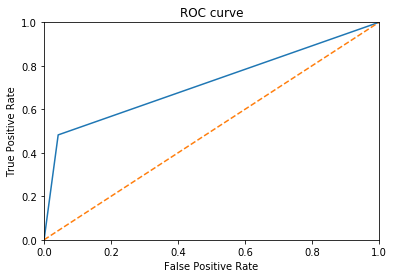

In [44]:
# CatBoost classifier + pr/roc curve
catboost_classifier(features_train, target_train, features_test, target_test)

- For a `catboost_classifier`, we obtained an F1 score of 0.58, accuracy of 92.17% for the training set and 85.87% for the test set.

<div class="alert alert-block alert-danger">

<b>Needs fixing:</b> Please use `predict_proba` instead of `predict` while visualizing curves: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python .
</div>

# <a id="4">Overall conclusion

The business task of this project is to predict customers’ bank churn, to do so we went through the following steps:
- In the first part , we downloaded and prepared the data. The data contained 10000 rows and 14 features. We’ve notice that 9.9% of the data is missing in the `Tenure` column, and the data is missing at random (MAR). 
- We replaced the missing values, changed the datatype, and encoded the categorical feature using one-hot encoding. We splitted the data into 70% training set, and 30% testing sets. 
- We’ve also standardized the numerical features of the data. 
- The size of the new table is 7000 rows and 11 columns for the train features set, and 3000 rows and 11 columns for the test features set.
- We trained the model without taking into account the imbalance. Achieving an F1 score of 0.303. 
- We assess the sanity of the model and observed the class imbalance in the dataset( the 0 much more than the 1).
- We improved the quality of the model using two approaches to fixing class imbalance. 
    - We first split the training sample into negative and positive observations, we duplicated the positive observations and combined them with the negative class observation. Then we shuffled the data using shuffle() function, and trained our LogisticRegression model with the new data. We calculated the F1 score to be 0.494
- We investigated several models and tuned different hyperparameters for those models
- From our investigation, we’ve seen that the CatBoost classifier gave 92.11% for the training set and 85.83% for the testing set, which is the best result compared to the other models. 
- In the final test prediction on the test data, we used the CatBoost classifier and  obtained an F1-score of 0.587.
- We’ve responded to the business task of this project which is to predict whether a customer will leave the bank soon with an accuracy of 85.83% and an F1-score of 0.587. 

<div class="alert alert-block alert-success">
<b>Success:</b> Glad to see well-structured conclusion at the end of the project!
</div>